In [1]:
# project: p8
# submitter: xxie65
# partner: none

In [2]:
import csv

def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

In [3]:
mapping_data = process_csv("small_mapping.csv")

In [4]:
def get_mapping(path):
    data = process_csv(path)
    mapping = {}
    for i in range(len(data)):
        ID = data[i][0]
        if not ID in mapping:
            mapping[ID] = []
        mapping[ID] = str(data[i][1])
    return mapping

In [5]:
#Q1: What is returned by your get_mapping("small_mapping.csv") function?
small_mapping = get_mapping("small_mapping.csv")
small_mapping

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [6]:
#Q2: What is the value associated with the key "nm0001219"?
small_mapping["nm0001219"]

'Gary Fleder'

In [7]:
#Q3: What are the values in the mapping associated with keys beginning with "nm"?
nm_keys = []
nm_values = []
for i in range(len(mapping_data)):
    keys = mapping_data[i][0]
    if keys.startswith("nm"):
        nm_keys.append(keys)
        nm_values.append(mapping_data[i][1])
nm_values

['John Cusack',
 'Mel Gibson',
 'Dustin Hoffman',
 'Danny Glover',
 'Gene Hackman',
 'Gary Busey',
 'Richard Donner',
 'Gary Fleder',
 'Mitchell Ryan']

In [8]:
#Q4: Which keys in the mapping map to people with a last name which starts with "G"?
g_keys = []
for i in range(len(mapping_data)):
    lastname = mapping_data[i][1].split()[1]
    if lastname.startswith("G"):
        g_keys.append(mapping_data[i][0])
g_keys

['nm0000154', 'nm0000418']

In [9]:
def get_raw_movies(path):
    movies = process_csv(path)
    header = movies[0]
    movies_data = movies[1:]
    list_of_movies = []
    for i in range(len(movies_data)):
        movies_dict = {}
        for k in range(len(header)):
            if header[k] == "directors" or header[k] == "actors" or header[k] == "genres":
                movies_data[i][k] = list(movies_data[i][k].split(","))
            elif header[k] == "year":
                movies_data[i][k] = int(movies_data[i][k])
            elif header[k] == "rating":
                movies_data[i][k] = float(movies_data[i][k])
        for j in range(len(header)):
            if not header[j] in movies_dict:
                movies_dict[header[j]] = []
            movies_dict[header[j]] = movies_data[i][j]
        list_of_movies.append(movies_dict)
    return list_of_movies

In [10]:
#Q5: What does get_raw_movies("small_movies.csv") return?
small_movies = get_raw_movies("small_movies.csv")
small_movies

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [11]:
#Q6: How many actors did the movie at index 1 have?
len(small_movies[1]["actors"])

4

In [12]:
#Q7: What is the ID of the first actor listed for the move at index 0?
small_movies[0]["actors"][0]

'nm0000131'

In [13]:
def get_movies(movies_path, mapping_path):
    movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for i in range(len(movies)):
        title = movies[i]["title"]
        directors = movies[i]["directors"]
        actors = movies[i]["actors"]
        movies[i]["title"] = mapping[title]
        for j in range(len(movies[i]["directors"])):
            directors = movies[i]["directors"][j]
            movies[i]["directors"][j] = mapping[directors]
        for k in range(len(movies[i]["actors"])):
            actors = movies[i]["actors"][k]
            movies[i]["actors"][k] = mapping[actors]
    return movies

In [14]:
#Q8: what is small[1]["title"]?
small = get_movies("small_movies.csv", "small_mapping.csv")
small[1]["title"]

'Lethal Weapon'

In [15]:
#Q9: What is small[0]["actors"]?
small[0]["actors"]

['John Cusack', 'Gene Hackman', 'Dustin Hoffman']

In [16]:
#Q10: What is small[-1]["directors"]?
small[-1]["directors"]

['Richard Donner']

In [17]:
#Q11: What are the last 3 rows in movies?
movies = get_movies("movies.csv", "mapping.csv")
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [18]:
#Q12: What are the first 2 rows in movies?
movies[:2]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']}]

In [19]:
import copy
movies_copy = copy.deepcopy(movies)
movies_copy2 = copy.deepcopy(movies)
movies_copy3 = copy.deepcopy(movies)
movies_copy4 = copy.deepcopy(movies)
movies_copy5 = copy.deepcopy(movies)
movies_copy6 = copy.deepcopy(movies)
# you are not allowed to change this function
def filter_movies_by_year(movies_copy, year):
    i = 0
    while i < len(movies_copy):
        if movies_copy[i]["year"] != year:
            movies_copy.pop(i)
        else:
            i += 1
    return movies_copy

In [20]:
#Q13: What are the movies from 1929?
filter_movies_by_year(movies_copy, 1929)

[{'title': 'Redskin',
  'year': 1929,
  'rating': 7.0,
  'directors': ['Victor Schertzinger'],
  'actors': ['Richard Dix', 'Tully Marshall', 'George Regas'],
  'genres': ['Adventure', 'Drama', 'Western']},
 {'title': 'The Girl in the Show',
  'year': 1929,
  'rating': 6.5,
  'directors': ['Edgar Selwyn'],
  'actors': ['Raymond Hackett', 'Edward J. Nugent'],
  'genres': ['Comedy']},
 {'title': 'Atlantic',
  'year': 1929,
  'rating': 5.5,
  'directors': ['Ewald André Dupont'],
  'actors': ['Franklin Dyall', 'John Stuart'],
  'genres': ['Drama']}]

In [21]:
#Q14: What are the movies from 1931?
filter_movies_by_year(movies_copy2, 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [22]:
#Q15: How many unique actor names are there in the dataset?
def uniq_names(data, col):
    data = copy.deepcopy(data)
    uniq_names = []
    for i in range(len(data)):
        for j in range(len(data[i][col])):
            if data[i][col][j] not in uniq_names:
                uniq_names += data[i][col][j].split(",")
    return len(uniq_names)
uniq_names(movies, "actors")

2605

In [23]:
#Q16: How many unique genres are there in the dataset?
uniq_names(movies, "genres")

18

In [24]:
#Q17: Which movie title in the dataset appears last alphabetically?
titles = []
for i in range(len(movies_copy3)):
    titles += movies_copy3[i]["title"].split(",")
sorted(titles)[-1]

'Zorba the Greek'

In [25]:
#Q18: What is the average movie rating?
total_ratings = 0
for i in range(len(movies_copy4)):
    total_ratings += movies_copy4[i]["rating"]
total_ratings/len(movies_copy4)

6.401659528907912

In [26]:
#Q19: What is the name of the highest rated movie?
highest_rated = ""
highest_rating = None
for i in range(len(movies_copy5)):
    if highest_rating == None or movies_copy5[i]["rating"] > highest_rating:
        highest_rating = movies_copy5[i]["rating"]
        highest_rated = movies_copy5[i]["title"]
highest_rated

'The Godfather'

In [27]:
#Q20: What is the oldest movie title in the dataset?
oldest = ""
oldest_year = None
for i in range(len(movies_copy6)):
    if oldest_year == None or movies_copy5[i]["year"] < oldest_year:
        oldest_year = movies_copy5[i]["year"]
        oldest = movies_copy5[i]["title"]
oldest

'Shoulder Arms'

In [28]:
def bucketize(movie_list, movie_key):
    # TODO: return dict of lists of movie dicts
    ans_dict = {}
    for dict in movie_list:
        key = dict[movie_key]
        if movie_key == "genres" or movie_key == "actors" or movie_key == "directors":
            for i in range(len(key)):
                sub_key = key[i]
                if not sub_key in ans_dict:
                    ans_dict[sub_key] = []
                ans_dict[sub_key].append(dict)
        else:
            if not key in ans_dict:
                ans_dict[key] = []
            ans_dict[key].append(dict)
    return ans_dict

In [29]:
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]

In [30]:
#Q21: What is bucketize(test_movies, "style")?
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [31]:
#Q22: What is bucketize(test_movies, "year")?
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
#Q23: What is bucketize(test_movies, "genres")?
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#Q24: What is bucketize(small, "genres")?
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [34]:
#Q25: How many different unique directors appear in the small dataset?
len(bucketize(small, "directors"))

2

In [35]:
#Q26: How many unique directors appear in the full dataset?
len(bucketize(movies, "directors"))

1247

In [36]:
#Q27: How many movies are there of each genre?
genres_ct = {}
for dict in movies:
    genres = dict["genres"]
    for i in range(len(genres)):
        genre = genres[i]
        if not genre in genres_ct:
            genres_ct[genre] = 0
        genres_ct[genre] += 1
genres_ct

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

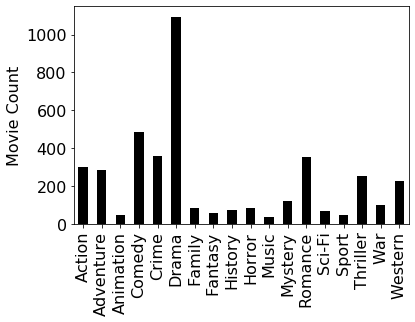

In [37]:
#Q28: How many movies are there of each genre? (plot your answer)
import matplotlib, pandas
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

plot_dict(genres_ct, "Movie Count")

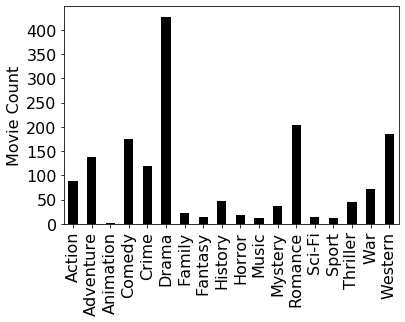

In [38]:
#Q29: How many movies are there of each genre, prior to 1970? (plot your answer)
genres_ct_1970 = {}
for dict in movies:
    if dict["year"] < 1970:
        genres = dict["genres"]
        for i in range(len(genres)):
            genre = genres[i]
            if not genre in genres_ct_1970:
                genres_ct_1970[genre] = 0
            genres_ct_1970[genre] += 1
plot_dict(genres_ct_1970, "Movie Count")

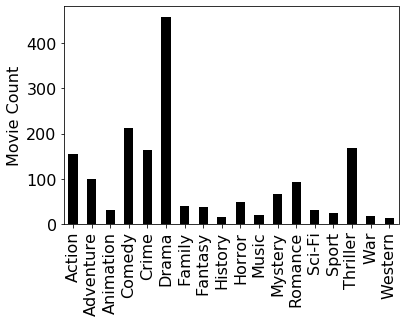

In [39]:
#Q30: How many movies are there of each genre, in or after 1990? (plot your answer)
genres_ct_1990 = {}
for dict in movies:
    if dict["year"] >= 1990:
        genres = dict["genres"]
        for i in range(len(genres)):
            genre = genres[i]
            if not genre in genres_ct_1990:
                genres_ct_1990[genre] = 0
            genres_ct_1990[genre] += 1
plot_dict(genres_ct_1990, "Movie Count")

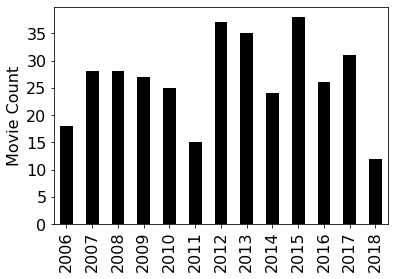

In [40]:
#Q31: How many movies have there been per year, after (not including) 2005? (plot your answer)
year_ct_2005 = {}
for dict in movies:
    if dict["year"] > 2005:
        year = dict["year"]
        if not year in year_ct_2005:
            year_ct_2005[year] = 0
        year_ct_2005[year] += 1
plot_dict(year_ct_2005, "Movie Count")

In [41]:
#Q32: What are the acting career spans of the actors who have acted for at least 45 years?
def career_span(position, years):
    people = []
    spans = {}
    for movie in movies:
        for item in movie[position]:
            if item not in people:
                people.append(item)
    for individual in people:
        first_year = None
        last_year = None
        for movie in movies:
            if individual in movie[position]:
                if first_year == None or movie["year"] < first_year:
                    first_year = movie["year"]
                if last_year == None or movie["year"] > last_year:
                    last_year = movie["year"]
        if first_year != None and last_year != None:
            span = last_year - first_year
        if span >= years:
            spans[individual] = span
    return spans
career_span("actors", 45)   

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Marlon Brando': 49,
 'Tony Curtis': 45,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Dean Stockwell': 53}

In [42]:
#Q33: What are the directing career spans of the directors who have directed for at least 25 years?
career_span("directors", 25)

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'J. Lee Thompson': 28,
 'Henry Hathaway': 36,
 'John Ford': 25,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'John Sturges': 25,
 'Richard Fleischer': 32,
 'Don Siegel': 27,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Burt Kennedy': 25,
 'William A. Graham': 25,
 'Richard Thorpe': 29,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [43]:
#Q34: Who are the top 10 actors with the longest careers?
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        span = spans[name]
        rows.append({"name": name, "span": span})
    rows.sort(key = row_ranking, reverse = True)
    return rows[:n]

top_n_span(career_span("actors", 0), 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [44]:
#Q35: Who are the top twenty one directors with the longest careers?
top_n_span(career_span("directors", 0), 21)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31},
 {'name': 'Cecil B. DeMille', 'span': 30},
 {'name': 'Lee H. Katzin', 'span': 30},
 {'name': 'John Huston', 'span': 30},
 {'name': 'Robert Siodmak', 'span': 30},
 {'name': 'Richard Thorpe', 'span': 29},
 {'name': 'J. Lee Thompson', 'span': 28},
 {'name': 'Don Siegel', 'span': 27},
 {'name': 'John Ford', 'span': 25},
 {'name': 'John Sturges', 'span': 25},
 {'name': 'Burt Kennedy', 'span': 25},
 {'name': 'William A. Graham', 'span': 25}]

In [45]:
import copy

def median(nums):
    numbs_copied = copy.copy(nums)
    numbs_copied.sort()
    if len(numbs_copied) % 2 == 1:
        return numbs_copied[len(numbs_copied) // 2]
    else:
        v1 = numbs_copied[len(numbs_copied) // 2]
        v2 = numbs_copied[len(numbs_copied) // 2 - 1]
        return (v1+v2) / 2
    
def best_people(position):
    medians = {}
    people = list(bucketize(movies, position).keys())
    for ppl in people:
        ratings = []
        for movie in bucketize(movies, position)[ppl]:
            ratings.append(movie["rating"])
        med = median(ratings)
        medians[ppl] = med
    return medians

In [46]:
#Q36: Who are the nine best actors?
def row_ranking(row):
    return row["rating"]

def top_n_rating(buckets, position, n):
    ratings = buckets
    rows = []
    for name in ratings:
        rating = ratings[name]
        count = len(bucketize(movies, position)[name])
        rows.append({"name": name, "rating": rating, "count": count})
    rows.sort(key = row_ranking, reverse = True)
    return rows[:n]

top_n_rating(best_people("actors"), "actors", 9)

[{'name': 'Heath Ledger', 'rating': 9.0, 'count': 1},
 {'name': 'John Fiedler', 'rating': 8.9, 'count': 1},
 {'name': 'Aldo Giuffrè', 'rating': 8.9, 'count': 1},
 {'name': 'Steven Williams', 'rating': 8.8, 'count': 1},
 {'name': 'Daniel Roebuck', 'rating': 8.8, 'count': 1},
 {'name': 'Joseph Gordon-Levitt', 'rating': 8.8, 'count': 1},
 {'name': 'Miyu Irino', 'rating': 8.6, 'count': 1},
 {'name': 'Andrew Kevin Walker', 'rating': 8.6, 'count': 1},
 {'name': 'Ken Watanabe', 'rating': 8.55, 'count': 2}]

In [47]:
#Q37: Who are the twelve best directors?
top_n_rating(best_people("directors"), "directors", 12)

[{'name': 'James Marlowe', 'rating': 8.8, 'count': 1},
 {'name': 'Kirk Wise', 'rating': 8.6, 'count': 1},
 {'name': 'David Fincher', 'rating': 8.6, 'count': 1},
 {'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'name': 'Adrian Molina', 'rating': 8.4, 'count': 1},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Moustapha Akkad', 'rating': 8.2, 'count': 1},
 {'name': 'Andrew Grieve', 'rating': 8.2, 'count': 6},
 {'name': 'Danny Boyle', 'rating': 8.2, 'count': 1}]

In [48]:
#Q38: Who are the fourteen best actors, if we only consider those who have acted in at least 5 movies?
def new_top_n_rating(buckets, position, n, N):
    ratings = buckets
    rows = []
    for name in ratings:
        count = len(bucketize(movies, position)[name])
        if count >= N:
            rating = ratings[name]
            rows.append({"name": name, "rating": rating, "count": count})
    rows.sort(key = row_ranking, reverse = True)
    return rows[:n]
new_top_n_rating(best_people("actors"), "actors", 14, 5)

[{'name': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'name': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'name': 'Robert Lindsay', 'rating': 8.2, 'count': 6},
 {'name': 'Charles Chaplin', 'rating': 8.149999999999999, 'count': 10},
 {'name': 'Bradley Cooper', 'rating': 7.3, 'count': 5},
 {'name': 'Joe Pesci', 'rating': 7.2, 'count': 7},
 {'name': 'Robin Williams', 'rating': 7.2, 'count': 5},
 {'name': 'Kirk Douglas', 'rating': 7.15, 'count': 12},
 {'name': 'Ward Bond', 'rating': 7.1, 'count': 10},
 {'name': 'Gregory Peck', 'rating': 7.1, 'count': 5},
 {'name': 'Tom Hanks', 'rating': 7.1, 'count': 6},
 {'name': 'Al Pacino', 'rating': 7.050000000000001, 'count': 8},
 {'name': 'Ben Johnson', 'rating': 7.050000000000001, 'count': 6},
 {'name': 'Charles Coburn', 'rating': 7.0, 'count': 9}]

In [49]:
#Q39: Who are the sixteen best actors, if we only consider those who have acted in at least 30 movies?
new_top_n_rating(best_people("actors"), "actors", 16, 30)

[{'name': 'Henry Fonda', 'rating': 6.9, 'count': 77},
 {'name': 'Mickey Rooney', 'rating': 6.7, 'count': 82},
 {'name': 'Anthony Quinn', 'rating': 6.7, 'count': 79},
 {'name': 'Brian Donlevy', 'rating': 6.7, 'count': 47},
 {'name': 'Robert Mitchum', 'rating': 6.65, 'count': 74},
 {'name': 'Glenn Ford', 'rating': 6.6, 'count': 74},
 {'name': 'George Sanders', 'rating': 6.6, 'count': 74},
 {'name': 'Robert De Niro', 'rating': 6.55, 'count': 74},
 {'name': 'Randolph Scott', 'rating': 6.5, 'count': 76},
 {'name': 'Jeff Bridges', 'rating': 6.5, 'count': 59},
 {'name': 'Ned Beatty', 'rating': 6.45, 'count': 50},
 {'name': 'Kurt Russell', 'rating': 6.4, 'count': 46},
 {'name': 'John Wayne', 'rating': 6.4, 'count': 130},
 {'name': 'John Cusack', 'rating': 6.4, 'count': 52},
 {'name': 'Danny Glover', 'rating': 6.4, 'count': 51},
 {'name': 'Dennis Quaid', 'rating': 6.35, 'count': 60}]

In [50]:
#Q40: Who are the eight best directors, if we only count directors having at least 8 movies?
new_top_n_rating(best_people("directors"), "directors", 8, 8)

[{'name': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'name': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'name': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'name': 'Charles Chaplin', 'rating': 8.1, 'count': 11},
 {'name': 'Hayao Miyazaki', 'rating': 8.1, 'count': 9},
 {'name': 'Martin Scorsese', 'rating': 8.0, 'count': 8},
 {'name': 'John Ford', 'rating': 7.3, 'count': 21},
 {'name': 'Fritz Lang', 'rating': 7.2, 'count': 9}]